# Tópico 17 – Correlação [<img src="images/colag_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 6.5%;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2017%20%E2%80%93%20Correla%C3%A7%C3%A3o%2F17%20%E2%80%93%20Correlacao.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 0%; vertical-align: middle; width: 3.25%;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2017%20%E2%80%93%20Correla%C3%A7%C3%A3o%2F17%20%E2%80%93%20Correlacao.ipynb)

Nessa aula, introduziremos o conceito de correlação, uma das métricas mais utilizadas (e mais interpretáveis) para medir a associação entre duas variáveis.

### Resultados Esperados

1. Definir o que é uma associação entre duas ou mais variáveis.
1. Discutir a importância das associações lineares.
1. Introduzir o conceito de correlação.

### Referências
- [CIT, Capítulo 15](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [1]:
## Imports para esse tópico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Opções gráficas
plt.rcParams['figure.figsize'] = (10, 5)

## Opções de como printar objetos do Numpy e do Pandas
np.set_printoptions(threshold = 20, precision = 2, suppress = True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

In [2]:
## Imports para visualizações mais específicas
from IPython.display import display
import ipywidgets as widgets
import plotly.express as px

In [3]:
## Funções para simulação de diagramas de dispersão
# ----

## Simular um diagrama de dispersão com correlação igual a `r`
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r * x + (np.sqrt(1 - r ** 2)) * z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'r = {r}')

## Simular vários diagramas de dispersão e organizá-los em uma grade
def show_scatter_grid():
    plt.subplots(1, 4, figsize=(10, 2))
    for i, r in enumerate([-1, -2/3, -1/3, 0]):
        plt.subplot(1, 4, i+1)
        r_scatter(r)
        plt.title(f'r = {np.round(r, 2)}')
    plt.show()
    plt.subplots(1, 4, figsize=(10, 2))
    for i, r in enumerate([1, 2/3, 1/3]):
        plt.subplot(1, 4, i+1)
        r_scatter(r)
        plt.title(f'r = {np.round(r, 2)}')
    plt.subplot(1, 4, 4)
    plt.axis('off')
    plt.show()

## Associação e previsão

### Previsão

- Suponha que tenhamos um conjunto de dados com no mínimo duas variáveis numéricas.
- Nesse contexto, estamos interessados em **prever** uma variável com base nos valores de uma outra (ou de outras).

Exemplos:
- Com base no meu nível educacional, qual seria minha renda?
- Com base na minha altura, qual seria a altura do meu filho?
- Com base na minha idade, quantos países (ou continentes) eu já teria visitado? 

- Para fazermos uma "boa previsão", o primeiro passo é identificar _padrões comuns_ às duas variáveis.
- Informalmente, uma medida que quantifica os padrões comuns observados entre duas (ou mais) variáveis é denominada de **medida de associação**.

### Associação

- Um pouco mais formalmente, uma **associação** é qualquer tipo de relação entre duas variáveis que pode ser descrita por uma função.
- Naturalmente, essa relação _pode ou não_ ser linear.

- Uma maneira comum de representarmos uma relação funcional entre duas variáveis é elaborando um gráfico dos seus valores como pontos em um plano Cartesiano.
- Lembre do Tópico 5 que esse tipo de gráfico é conhecido como **diagrama de dispersão**!

- Se duas variáveis tem associação positiva ↗️, então à medida que uma aumenta, a outra tende a aumentar.
- Se duas variáveis tem associação negativa ↘️, então à medida que uma aumenta, a outra tende a diminuir. 

- Em geral, se duas variáveis estão associadas, podemos utilizar a natureza dessa associação para predizer uma variável com base no valor da outra.

### Exemplo: carros híbridos 🚗

Nosso [conjunto de dados](https://search.r-project.org/CRAN/refmans/DJL/html/dataset.hev.2013.html) aqui contém diferentes informações sobre vários carros híbridos, cujos anos do modelo variam de 1997 a 2013.

In [4]:
hybrid = pd.read_csv('https://raw.githubusercontent.com/urielmoreirasilva/urielmoreirasilva.github.io/refs/heads/main/aulas/T%C3%B3pico%2017%20%E2%80%93%20Correla%C3%A7%C3%A3o/data/hybrid.csv')
hybrid

,vehicle,year,price,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
...,...,...,...,...,...,...
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize
152,Chevrolet Volt,2013,39145.00,11.11,37.00,Compact


### `'price'` vs. `'acceleration'`

Existe alguma associação entre essas duas variáveis? Se sim, qual é a natureza dessa associação?

(<ins>Nota</ins>: Ao analisarmos um diagrama de dispersão, frequentemente nos referimos à relação entre as variáveis como "$y$ em função de $x$".)

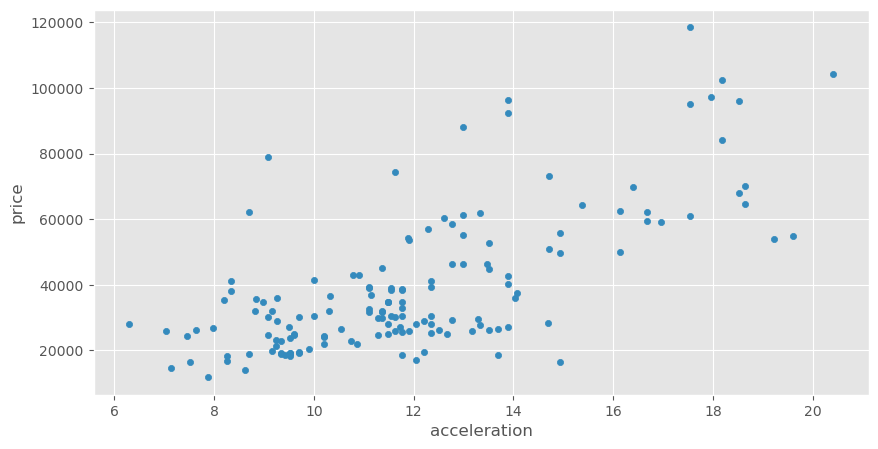

In [5]:
hybrid.plot(kind = 'scatter', x = 'acceleration', y = 'price');

A aceleração aqui é medida em quilômetros por hora por segundo, e logo acelerações maiores são sinônimos de carros mais rápidos!

### `'price'` vs. `'mpg'`

Existe associação entre essas variáveis? Se sim, de qual tipo?

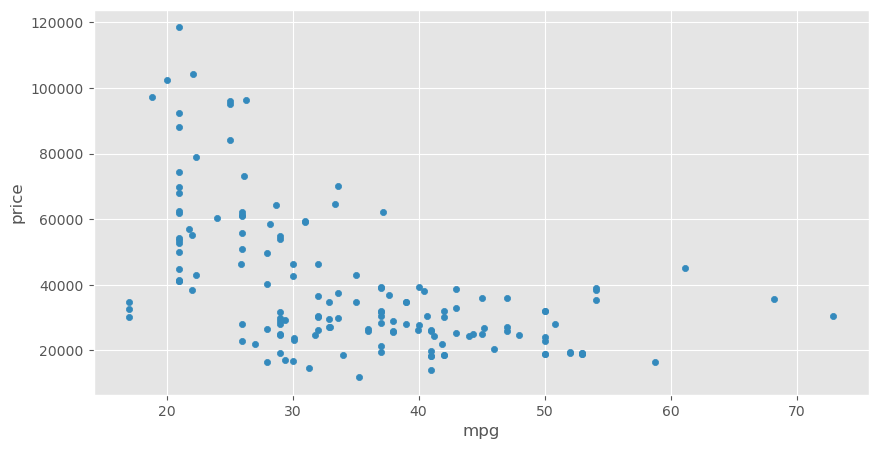

In [6]:
hybrid.plot(kind='scatter', x='mpg', y='price');

A associação acima parece ser negativa: carros com maior rendimento tendem a ser mais baratos.

Porém, a associação _não parece ser linear_!

Uma função que poderia descrever essa associação é $y \approx \frac{1}{x}$.   

### Explorando os dados

Conforme aprendemos no Tópico 03, podemos filtrar o DataFrame `hybrid` de acordo com alguma característica de interesse, apenas para fins exploratórios.

Por exemplo, podemos estar interessados nos carros mais caros:

In [7]:
hybrid[hybrid['price'] >= 100000]

,vehicle,year,price,acceleration,mpg,class
29,Lexus LS600h/hL,2007,118543.60,17.54,21.00,Midsize
60,ActiveHybrid 7,2010,104300.43,20.41,22.11,Large
95,ActiveHybrid 7i,2011,102605.66,18.18,20.00,Midsize


... ou nos mais potentes:

In [8]:
hybrid[hybrid['acceleration'] >= 19]

,vehicle,year,price,acceleration,mpg,class
60,ActiveHybrid 7,2010,104300.43,20.41,22.11,Large
105,M35h,2012,53860.45,19.23,29.00,Midsize
143,M35h,2013,54750.00,19.61,29.00,Midsize


... ou até nos mais econômicos!

In [9]:
hybrid[hybrid['mpg'] >= 60]

,vehicle,year,price,acceleration,mpg,class
53,Auris HSD,2010,35787.29,8.85,68.21,Compact
79,Prius alpha (V),2011,30588.35,10.00,72.92,Midsize
80,3008,2011,45101.54,11.36,61.16,Compact


### Medindo uma associação

- A partir de um diagrama de dispersão, podemos ter uma boa ideia se duas variáveis estão associadas, e se essa associação é positiva ou negativa.
- Porém, embora os diagramas de dispersão sejam ferramentas muito úteis, um diagrama de dispersão é no fundo uma _ferramenta gráfica/visual_.
- Para termos uma noção _quantitativa_ da associação entre duas variáveis, precisamos de uma _medida de associação_!

## Correlação

### Coeficiente de Correlação (de Pearson)

- O coeficiente de correlação $r$ entre duas variáveis $X$ e $Y$ mede a **força da associação linear entre $X$ e $Y$**.
- De maneira informal, $r$ mede o quão "próximos" os pontos de $X$ e $Y$ estão ao redor de uma reta.

- $r$ é igual a: 
    - **média** dos 
    - **produtos** entre $X$ e $Y$,
    - quando $X$ e $Y$ são ambas expressas em **unidades padronizadas**.

Antes de definir $r$ formalmente, vamos analisar alguns exemplos para trabalharmos um pouco nossa intuição.

### Exemplo: Diagramas de dispersão para diferentes valores de $r$

Considere os seguintes diagramas de dispersão:

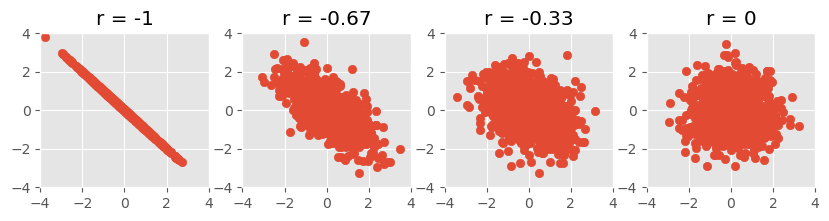

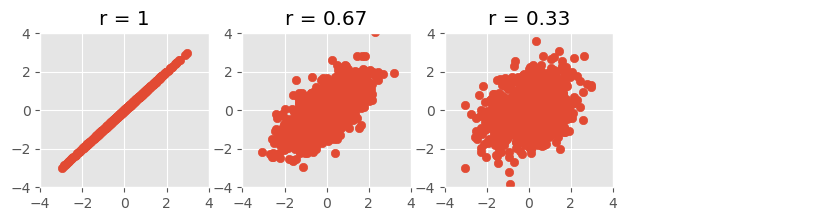

In [10]:
show_scatter_grid()

- O sinal de $r$ (negativo ou positivo) define a natureza da associação (linear) entre $X$ e $Y$, isto é:
    - se $r < 0$, então $X$ e $Y$ são _negativamente associadas_ (e logo **negativamente correlacionadas**);
    - se $r > 0$, então $X$ e $Y$ são _positivamente associadas_ (e logo **positivamente correlacionadas**);
    - se $r = 0$, _não existe associação_ (linear) entre $X$ e $Y$ (e logo dizemos que $X$ e $Y$ são **não-correlacionadas**).

- É possível provar (você verá isso em outros cursos!) que $r$ está sempre entre -1 e 1.
    - Quando $r = 1$, dizemos que existe uma **correlação perfeita** entre $X$ e $Y$, ou que a relação entre $X$ e $Y$ é **perfeitamente linear**.
    - Analogamente, o mesmo vale para $r = -1$, mas nesse caso dizemos que a correlação entre $X$ e $Y$ é **perfeitamente negativa**.

### Exercício ✅ 

Analise o diagrama de dispersão a seguir, e preencha a célula de texto abaixo com a afirmativa **correta** sobre a relação entre $X$ e $Y$:

**A**. $X$ e $Y$ são associadas e correlacionadas.

**B**. $X$ e $Y$ são associadas, mas não são correlacionadas.

**C**. $X$ e $Y$ não são associadas, mas são correlacionadas.

**D**. $X$ e $Y$ não são associadas e nem são correlacionadas.


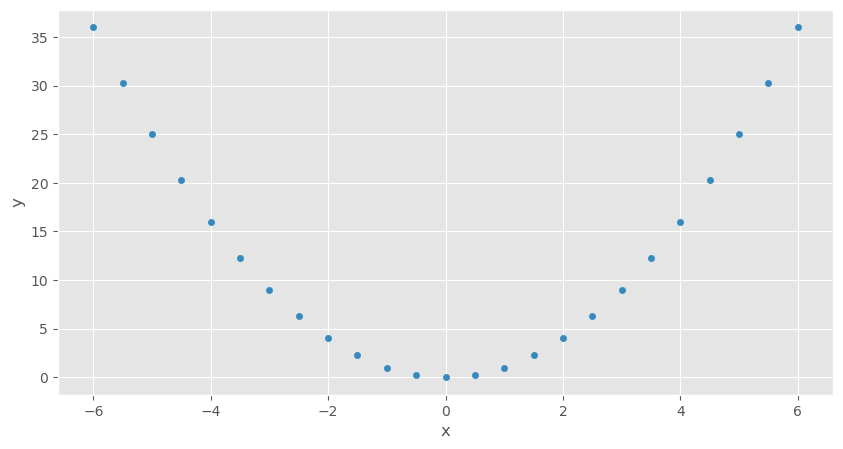

In [11]:
x2 = pd.DataFrame({
    "x" : np.arange(-6, 6.1, 0.5), 
    "y" : np.arange(-6, 6.1, 0.5) ** 2
})
x2.plot(kind = 'scatter', x = 'x', y = 'y');

> ...

### Definição formal

- Para uma amostra de tamanho $n$ de duas variáveis $\boldsymbol{X} := (X_1, \ldots, X_n)$ e $\boldsymbol{Y} := (Y_1, \ldots, Y_n)$, o **coeficiente de correlação amostral** $r$ é definido por

\begin{equation*}
    r := \frac{\sum^n_{i=1} (X_i - \bar{X}) (Y_i - \bar{Y})}{\sqrt{\sum^n_{i=1} (X_i - \bar{X})^2} \sqrt{\sum^n_{i=1} (Y_i - \bar{Y})^2}} = \frac{\sum^n_{i=1} (X_i - \bar{X}) (Y_i - \bar{Y}) / n}{\sqrt{S^2_x} \sqrt{S^2_y}} = \frac{\sum^n_{i=1} (X_i - \bar{X}) (Y_i - \bar{Y}) / n}{S_x S_y},
\end{equation*}

onde $\bar{X}$ e $S_x$ são a média amostral e o desvio padrão amostral de $\boldsymbol{X}$, e $\bar{Y}$ e $S_y$ são a média amostral e o desvio padrão amostral de $\boldsymbol{Y}$, respectivamente.

- Note que, na definição acima, explicitamos o fato de $r$ ser uma correlação **amostral** pois a correlação é apenas um parâmetro.
- Dessa forma, para uma certa população, existe também a **correlação populacional**, $\rho$.
- Como na prática não sabemos $\rho$, utilizamos $r$ (que é uma estatística) como uma estimativa de $\rho$, assim como fazemos com qualquer parâmetro de interesse.

- <u>Nota histórica</u>:  O coeficiente de correlação $r$ é comumente denominado de coeficiente de correlação _de Pearson_, porque foi amplamente estudado por Karl Pearson por volta do ano 1895, com base em algumas das ideias que Francis Galton desenvolvera por volta do ano 1880.
- Você verá outros coeficientes de correlação e outras medidas de associação em outros cursos, mas o coeficiente de correlação de Pearson é sem dúvida o mais popular! 

### De volta à definição intuitiva

- Voltando à definição anterior e intuitiva, em que $r$ é a "média dos produtos entre $X$ e $Y$, quando $X$ e $Y$ são ambas expressas em unidades padronizadas", primeiramente note que as unidades padronizadas correspondentes à cada $X_i$ e $Y_i$ são dadas por, respectivamente,

\begin{align*}
    X_{i \: \text{(su)}} &:= \frac{X_i - \bar{X}}{S_x}, & & & Y_{i \: \text{(su)}} &:= \frac{Y_i - \bar{Y}}{S_y}.
\end{align*}

- Dessa forma, podemos reescrever então

\begin{equation*}
    r = \frac{\sum^n_{i=1} (X_i - \bar{X}) (Y_i - \bar{Y}) / n}{S_x S_y} = \frac{1}{n} \sum^n_{i=1} \frac{(X_i - \bar{X})}{S_x} \frac{(Y_i - \bar{Y})}{S_y} = \frac{1}{n} \sum^n_{i=1} X_{i \: \text{(su)}} Y_{i \: \text{(su)}},
\end{equation*}

e que logo corresponde à definição intuitiva acima.

### Interpretando $r$

- Como mencionado anteriormente, o coeficiente de correlação $r$ mede a **força da associação linear entre $X$ e $Y$**.
- Dessa forma, se $r \neq 0$, dizemos que $X$ e $Y$ são _correlacionadas_, e logo existe algum "grau" de _associação linear_ entre $X$ e $Y$.
- O "grau" de associação linear entre $X$ e $Y$ é exatamente dado pela **magnitude** da correlação entre $X$ e $Y$, isto é, por $|r|$.
    - Dessa forma, o **sinal** de $r$ mede a **direção** da associação entre $X$ e $Y$, mas sua **força** é medida por $|r|$.

- Voltando ao nosso objetivo original (de prever de $Y$ como função de $X$), podemos dizer que $r$ **quantifica o quão bem podemos prever (de maneira linear) uma variável aravés dos valores da outra**.
    - Se $r \approx 1$ ou $r \approx -1$, podemos fazer uma "boa previsão" de $Y$ como _função linear_ de $X$.
    - Se $r \approx 0$, não podemos fazer uma boa previsão de $Y$ como _função linear_ de $X$.

- Finalmente, note que o coeficiente de correlação é _simétrico_, isto é, a correlação entre $X$ e $Y$ é igual à correlação entre $Y$ e $X$.
    - Isso é intuitivo e relativamente fácil de visualizar, pois na fórmula de $r$ temos $X_{i \: \text{(su)}} \cdot Y_{i \: \text{(su)}} = Y_{i \: \text{(su)}} \cdot X_{i \: \text{(su)}}$ para cada $i$!

### Calculando $r$ no Python

Vamos agora calcular o valor de $r$ para os dois diagramas de dispersão que fizemos acima: `'price'` vs. `'acceleration'` e `'price'` vs. `'mpg'`.

Primeiramente, vamos definir uma função que expressa $X$ ou $Y$ (colunas de um `DataFrame`) em unidades padronizadas:

In [12]:
## Padronizando uma Series

def standard_units(col):
    return (col - col.mean()) / np.std(col)

Agora, vamos definir uma função que calcula a correlação $r$ a partir das unidades padronizadas:

In [13]:
## Calculando a correlação através da 
# --- média do produto de X e Y padronizadas

def calculate_r(df, x, y):
    x_su = standard_units(df.get(x))
    y_su = standard_units(df.get(y))
    return (x_su * y_su).mean()

### `'price'` vs. `'acceleration'`

Voltando aos exemplos anteriores, vamos primeiro calcular a correlação $r$ entre `'acceleration'` e `'price'`:

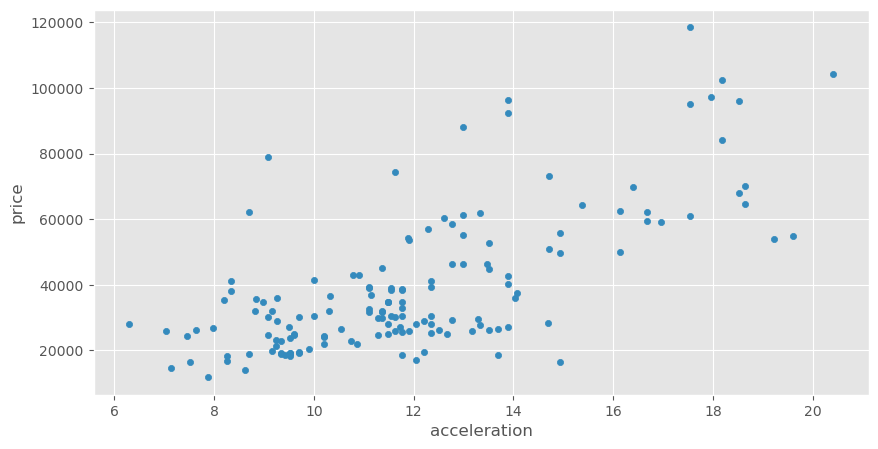

In [14]:
hybrid.plot(kind = 'scatter', x = 'acceleration', y = 'price');

In [15]:
calculate_r(hybrid, 'acceleration', 'price')

0.695577899691398

Como $r > 0$, a associação entre `'acceleration'` e `'price'` é positiva.

### `'price'` vs. `'mpg'`

Agora, vamos calcular a correlação entre `'mpg'` e `'price'`:

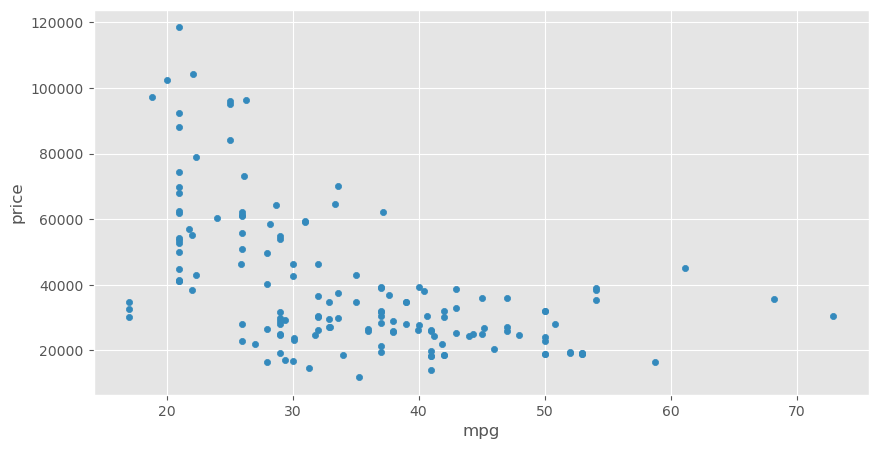

In [16]:
hybrid.plot(kind = 'scatter', x = 'mpg', y = 'price');

In [17]:
calculate_r(hybrid, 'mpg', 'price')

-0.5318263633683782

Aqui, $r < 0$, e logo a associação entre `'mpg'` and `'price'` é negativa.

Note que, como aqui $|r| \simeq 0.53$ e no exemplo anterior $|r| \simeq 0.70$, a _magnitude_ da correlação entre `'mpg'` e `'price'` é menor do que a magnitude da correlação entre `'acceleration`' e `'price'`.

Em outras palavras, a relação entre `'mpg'` e `'price'` é "menos linear" (ou "mais fraca") do que aquela entre `'acceleration`' e `'price'`.

### Transformações lineares

- Para entender melhor porque utilizamos unidades padronizadas na correlação $r$, precisamos antes de definir o conceito de **transformações lineares**.

- Formalmente, dada uma amostra $\boldsymbol{X} := (X_1, \ldots, X_n)$ de uma variável $X$, uma **transformação linear** de $X$ é definida por

\begin{equation*}
    a + b \cdot X_i
\end{equation*}

para todo $i = 1, \ldots, n$, $a \in \mathbb{R}$ e $b \in \mathbb{R}$.

- Uma transformação linear claramente modifica a **locação** e a **escala** de $X$, mas também pode modificar as **unidades de medida de $X$**!

- Por exemplo, a fórmula de conversão de graus Celsius para graus Fahrenheit é uma transformação linear com $a = 32$ e $b = \frac{9}{5}$, pois
    
$$X^\text{Fahrenheit}_i = 32 + \frac{9}{5} X^\text{Celsius}_i.$$

- Analogamente, podemos converter uma quantidade qualquer de reais $X^\text{BRL}_i$ em dólares (cotação do dia 17/06/25) tomando $a = 0$ e $b = 5.48$:

$$X^\text{USD}_i = 5.48 X^\text{BRL}_i \:\:\: 😀$$

... e converter de volta (de dólares para reais) tomando $a = 0$ e $b = \frac{1}{5.48} = 0.18$:

$$X^\text{BRL}_i = 0.18 X^\text{USD}_i \:\:\: 😢$$

### E porque então utilizamos variáveis padronizadas no cálculo de $r$?

- Voltando à nossa pergunta original, primeiramente note que **a própria padronização é uma transformação linear**!
    - Como $X_{i \: \text{(su)}} = (X_i - \bar{X})/S_x = X_i/S_x - \bar{X}/S_x$, para ver isso basta tomar $a = 1/S_x$ e $b = - \bar{X}/S_x$ na transformação linear acima.

- Dessa forma, como a padronização elimina a influência da unidade de medida sobre $X_i$ (uma vez que $X_{i \: \text{(su)}}$ está expressa em unidades padronizadas), **utilizamos variáveis padronizadas para que o coeficiente de correlação $r$ não seja influenciado pelas escalas/unidades de medida das nossas variáveis**.
    - Como consequência, dizemos então que $r$ é **invariante à escala**.

- Na verdade, é ainda mais correto dizer que $r$ _invariante à transformações lineares_, pois a padronização elimina _qualquer_ influência de locação e escala, de forma que $X_{i \: \text{(su)}}$ é _idêntica_ se for calculada com base nos valores de $X_i$ ou nos valores de $a + b \cdot X_i$. 

### Transformações lineares em diagramas de dispersão

- Em vista do que foi exposto acima, quando aplicamos uma transformação linear às variáveis em um diagrama de dispersão, **mudamos apenas os eixos $x$ e $y$**, isto é, as unidades de medida das variáveis representadas no diagrama!
- Dessa forma, como as transformações lineares não alteram a correlação entre $X$ e $Y$, a associação entre essas variáveis representada no diagrama de dispersão também não se altera!

- Embora esse seja um ponto sutil, em um diagrama de dispersão estamos apenas representando pontos ordenados $(X_i, Y_i)$ em um plano cartesiano.
- Como consequência, se rotacionarmos, "esticarmos" ou deslocarmos os eixos, a relação _fundamental_ entre esses pontos _não se altera_.

Voltando ao nosso exemplo original dos carros, note que o padrão visto no diagrama de dispersão continua o mesmo ao expressarmos os preços em _ienes_ ao invés de _dólares_, e/ou a autonomia em _quilômetros por galão_ ao invés de _milhas por galão_:

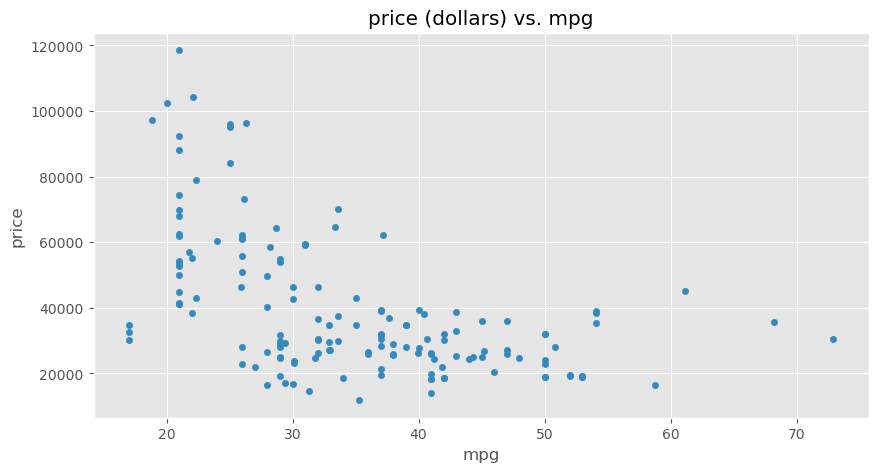

In [18]:
## Diagrama de dispersão entre autonomia (em mpg) e preço (em dólares)
hybrid.plot(kind = 'scatter', x = 'mpg', y = 'price', title = 'price (dollars) vs. mpg');

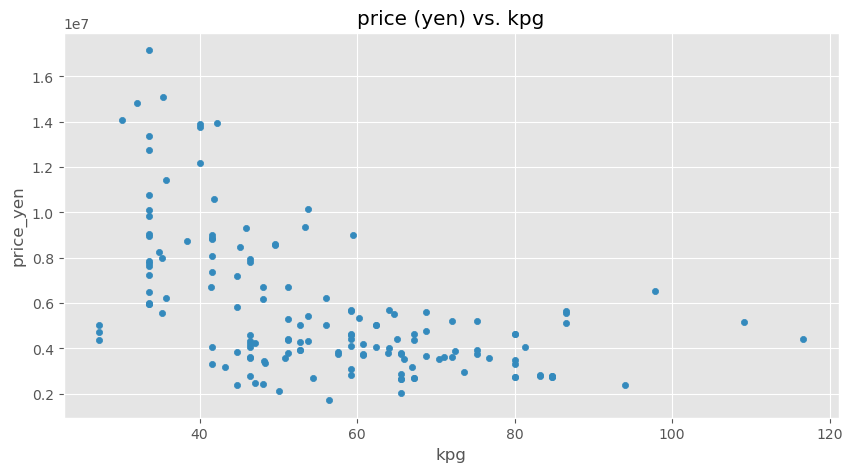

In [19]:
## Diagrama de dispersão entre autonomia (em mpg) e preço (em dólares)
## NOTA: 1 USD = 144.72 yen (17/06/25), e 1 mi = 1.6km

hybrid.assign(
    price_yen = hybrid['price'] * 144.72,
    kpg = hybrid['mpg'] * 1.6
).plot(kind = 'scatter', x = 'kpg', y = 'price_yen', title='price (yen) vs. kpg');

A única diferença entre os diagramas acima está nos seus eixos! 👍

### Exercício ✅ 

Execute a célula de código abaixo para definir um `DataFrame` de nome `hybrid_2` contendo o preço dos carros em ienes e a autonomia em kpg. Modifique então as células que se seguem para calcular a correlação $r$ entre os preços em dólares e a autonomia em mpg (ambos em `hybrid`) e a correlação $r$ entre os preços em ienes e a autonomia em kpg (ambos em `hybrid_2`). Existe alguma diferença entre os valores obtidos? Porque? Comente na célula de texto que se segue.

In [20]:
## Definindo um DataFrame com preços em ienes e autonomia em kpg
hybrid_2 = pd.DataFrame({"price_yen" : hybrid['price'] * 144.72, "kpg" : hybrid['mpg'] * 1.6})

In [21]:
# ## Descomente e execute
# calculate_r(hybrid, ..., ...)

In [22]:
# ## Descomente e execute
# calculate_r(hybrid_2, ..., ...)

> ...

## Resumo

- O coeficiente de correlação $r$ mede a **força de associação linear** entre $X$ e $Y$.
    - Esse coeficiente sempre satisfaz $r \in [-1, 1]$.
- A **magnitude** da associação linear entre $X$ e $Y$ é dada por $|r|$.
- Analogamente, o **sinal** de $r$ nos dá a **direção da associação** entre $X$ e $Y$.
    - Se $r < 0$, $X$ e $Y$ são **negativamente** associadas;
    - Se $r > 0$, $X$ e $Y$ são **positivamente** associadas.
- A correlação é simétrica e **invariante sob transformações lineares**.
    - Dessa forma, o valor de $r$ é o mesmo **qualquer que sejam** as unidades de medida de $X$ e $Y$.